In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings;
with warnings.catch_warnings():
    warnings.simplefilter("ignore"); 
    import matplotlib.pyplot as plt

import os
import sys
from pathlib import Path
import IPython
from PySpice.Math import *
import numpy as np

import schemdraw
import schemdraw.elements as elm
from schemdraw import dsp
from schemdraw import logic
from schemdraw import flow

from IPython.display import Javascript
from IPython.display import display, HTML
from IPython.display import Markdown as md
from IPython.display import Latex

# construction

The lowpass gate filter topology is a Sallen and Key filter where the two resistors are replaced with a vactrol. A vactrol is a device with an LDR and a LED. The brightness of the LED will change the resistance of the LDR. This gives a variable cutoff frequency. The lowest frequency has to be in the inaudible range. This will make the LPG quiet if there is no control voltage applied. 

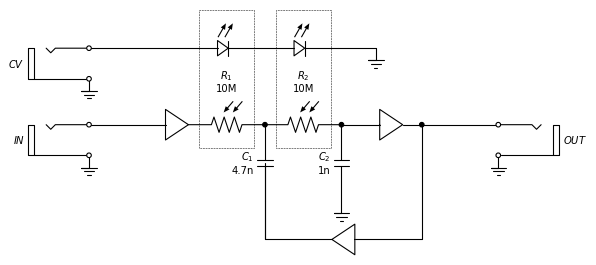

In [2]:
d = schemdraw.Drawing(unit=2.5, inches_per_unit=0.5, lw=1.1, fontsize=10)

J2 = d.add(elm.AudioJack(xy=[0, 2*d.unit], lftlabel='$CV$'))
d.add(elm.Ground("right", xy=J2.sleeve))
d.add(elm.Line( "right", l=1.25*d.unit, at=J2.tip))
d.add(elm.LED())
d.add(elm.LED())
d.add(elm.Line(l=d.unit/2))
d.add(elm.Ground())

J1 = d.add(elm.AudioJack(xy=[0, d.unit], lftlabel='$IN$'))
d.add(elm.Ground("right", xy=J1.sleeve))
d.add(elm.Line( "right", l=d.unit, at=J1.tip))
D4 = d.add(dsp.Amp())
R1 = d.add(elm.Photoresistor(label='$R_1$\n10M'))
d.add(elm.Dot())
R2 = d.add(elm.Photoresistor(label='$R_2$\n10M'))
d.add(elm.Dot())
d.add(elm.Line(l=d.unit/2))
D4 = d.add(dsp.Amp())

L4 = d.add(elm.Line( "right", l=d.unit/4))
d.add(elm.Dot())
d.add(elm.Line( "right", l=d.unit))
JO4 = d.add(elm.AudioJack("left", switch=False, flip=True, anchor='tip', rgtlabel='$OUT$'))
d.add(elm.Ground("right", xy=JO4.sleeve))

d.add(elm.Capacitor("down", at=R1.end, label='$C_1$\n4.7n'))
d.add(elm.Line(l=0.5*d.unit))
d.add(elm.Capacitor("down", at=R2.end, label='$C_2$\n1n'))
d.add(elm.Ground())

d.add(elm.Line("down", at=L4.end, l=1.5*d.unit))
d.add(elm.Line("left", l=0.875*d.unit))
d.add(dsp.Amp("left"))
d.add(elm.Line("left", l=0.875*d.unit))
d.add(elm.Line("up"))

d.add(flow.Box(xy=[4.5, 2.9*d.unit], w=1.8, h=4.5).linewidth(0.5).linestyle('--'))
d.add(flow.Box(xy=[7, 2.9*d.unit], w=1.8, h=4.5).linewidth(0.5).linestyle('--'))

d.draw()


The cutoff-frequency for this values is:

In [3]:
val = float(10000000 * 10000000 * 0.0000000047 * 0.000000001)
break_frequency = 1 / (2 * math.pi * float( math.sqrt( val ) ) )

In [4]:
Latex(r'''
\begin{array}{c}
f_c=\frac{1}{2\pi \sqrt{R_1 R_2 C_1 C_2}}=\frac{1}{2\pi \sqrt{10M\Omega * 10M\Omega * 0.47nF * 0.47nF}}=%.1f Hz
\end{array}
''' % break_frequency )

<IPython.core.display.Latex object>

In [5]:
val = float(500000 * 500000 * 0.0000000047 * 0.000000001)
break_frequency = 1 / (2 * math.pi * float( math.sqrt( val ) ) )

In [6]:
md('''
The Vactrol resistance depends very much on the type and the ambient light. In the Xvive 5C3 datasheet the off resistance is stated with 10MΩ. But on the bench, it will raise to 1MΩ and higher when the desktop light is turned on. The off resistance is important, especially when you want to build the vactrol yourself. The LDR from Adafruit, as an example, has an off resistance of 500kΩ. This would result in a cutoff frequency of %.1f Hz. This is already in the audible range and the LPG would never turn off.
''' % break_frequency )


The Vactrol resistance depends very much on the type and the ambient light. In the Xvive 5C3 datasheet the off resistance is stated with 10MΩ. But on the bench, it will raise to 1MΩ and higher when the desktop light is turned on. The off resistance is important, especially when you want to build the vactrol yourself. The LDR from Adafruit, as an example, has an off resistance of 500kΩ. This would result in a cutoff frequency of 146.8 Hz. This is already in the audible range and the LPG would never turn off.


{% include bom.html%}
{% include callouts.html %}
{% include reports.html%}

# calibration


# usage

the input jacks are wired to 5 volts when nothing is connected.

all channels are mixed to the out jack. when something is connected to the channel out, this channel is removed from the overall mix.

_mixer_
* connect the different channels from audio or cv sources to the in jacks.
* connect the out jack to something
* turn the pots clockwise to adjust the volume.

_attenuverter_
* connect all or a single channel. 
* when you turn the pot knob counter clockwise the signal is inverted.

# references

- [LPG](https://electronicmusic.fandom.com/wiki/Lowpass_gate) definition at fandom wiki.
- [Sallen and Key Filter](https://www.electronics-tutorials.ws/filter/sallen-key-filter.html) description at electronics-tutorials.
- [Resonant Lopass Gate](http://172.17.0.2:8888/lab?token=277560ab28730e6793e075a980f9a3e7c1e118d0476be155) electro-music.com
- [Xvive Vactrol](https://www.thonk.co.uk/wp-content/uploads/Documents/xvive/) Datasheets
